In [373]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, roc_auc_score, roc_curve, auc  
from scipy.stats import bootstrap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

In [374]:
df = pd.read_csv('/Users/sarahrestrepo/Desktop/Final_Project/data_cleaning_stroke.csv')

In [375]:
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_BoxCox,bmi_BoxCox
0,0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes,0.926296,3.501538
1,1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes,0.925920,3.287371
2,2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes,0.922886,3.393853
3,3,Female,49,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes,0.925326,3.445335
4,4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes,0.925391,3.119797


In [376]:
df.shape

(5109, 14)

In [377]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [378]:
df['stroke'].value_counts()

No     4860
Yes     249
Name: stroke, dtype: int64

In [379]:
df=df.drop(['bmi','avg_glucose_level'],axis = 1)

In [380]:
df.dtypes

gender                       object
age                           int64
hypertension                 object
heart_disease                object
ever_married                 object
work_type                    object
residence_type               object
smoking_status               object
stroke                       object
avg_glucose_level_BoxCox    float64
bmi_BoxCox                  float64
dtype: object

In [381]:
x = df.drop('stroke',axis =1)
y = df['stroke']

In [382]:
scaled = StandardScaler().fit_transform(x.select_dtypes(np.number))
scaled = pd.DataFrame(scaled)
scaled

,0,1,2
0,1.050758,1.862392,1.040788
1,0.785653,1.700511,0.127983
2,1.625151,0.395031,0.581821
3,0.255444,1.445120,0.801246
4,1.580967,1.472918,-0.586233
...,...,...,...
5104,1.625151,-0.348434,0.127983
5105,1.669335,0.822589,1.384231
5106,-0.363133,-0.381167,0.349324
5107,0.343813,1.395291,-0.338090


In [383]:
encode = OneHotEncoder(drop='first').fit_transform(x.select_dtypes(object)).toarray()
encoded = pd.DataFrame(encode)
encoded.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [384]:
label_mapping = {'No': 0, 'Yes': 1}
y = y.map(label_mapping)

In [385]:
y.tail()

5104    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, dtype: int64

In [386]:
x_con = pd.concat([scaled,encoded], axis=1)
x_con = x_con.reset_index(drop=True)
x_con.columns = range(x_con.shape[1])
x_con.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.050758,1.862392,1.040788,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.785653,1.700511,0.127983,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.625151,0.395031,0.581821,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.255444,1.445120,0.801246,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.580967,1.472918,-0.586233,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [387]:
#using smote to upsample sate
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(x_con, y)
y_sm.value_counts()

1    4860
0    4860
Name: stroke, dtype: int64

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1)

In [389]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
9016,1.479600,1.764232,0.039881,1.0,0.258839,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.258839,0.0
2520,-0.760790,1.686980,0.509885,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0
3262,1.404231,-0.034044,-1.026234,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0
2419,-0.539869,-1.770165,-0.353148,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,1.0
2174,0.653101,-1.126382,1.726435,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0


In [390]:
y_train.head()

9016    1
2520    0
3262    0
2419    0
2174    0
Name: stroke, dtype: int64

In [391]:
#Logistic Regression
model_1 = LogisticRegression().fit(X_train, y_train)

In [392]:
pred_1 = model_1.predict(X_test)
print(classification_report(y_test, pred_1))
pred_1

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1456
           1       0.76      0.82      0.79      1460

    accuracy                           0.78      2916
   macro avg       0.78      0.78      0.78      2916
weighted avg       0.78      0.78      0.78      2916



array([1, 0, 0, ..., 0, 1, 0])

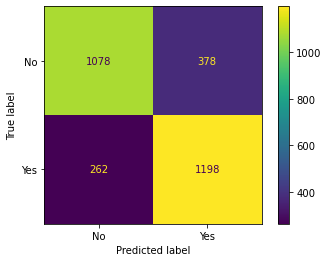

In [393]:
confm_1 = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_1), display_labels = ['No', 'Yes']).plot()
confm_1

In [394]:
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test, pred_1).ravel()
(tn_1, fp_1, fn_1, tp_1)

(1078, 378, 262, 1198)

In [395]:
# Accuracy is 79%, this means the model correctly predicated the data 77.94% of the time.
# Precision is 75%, this model is predicts positive instances 75% of the time.
# Sensitivity(recall) is 83%, this model is sensitive to true positive 83% of the time. 
# Specificity is 73%, this model is specific to 73% of true negatives.

accuracy_1 = (tp_1 + tn_1) / len(y_test)
precision_1 = tp_1 / (tp_1 + fp_1)
sensitivity_1 = tp_1 / (tp_1 + fn_1)
specificity_1 = tn_1 / (fp_1 + tn_1)

print('Logistic Regression Metrics')
print('Accuracy = ', accuracy_1)
print('Precision = ', precision_1)
print('Sensitivity = ', sensitivity_1)
print('Specificity = ', specificity_1)

Logistic Regression Metrics
Accuracy =  0.7805212620027435
Precision =  0.7601522842639594
Sensitivity =  0.8205479452054795
Specificity =  0.7403846153846154


In [396]:
pred_1_probs = model_1.predict_proba(X_test)[:,1]
pred_1_probs

array([0.66107978, 0.28658221, 0.4524973 , ..., 0.01991318, 0.53992251,
       0.05915568])

In [397]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_1_probs, pos_label= 1)

In [398]:
#Logistic regression model is classifying instances correctly 85% of the time.
roc_auc_1 = auc(fpr1, tpr1)
roc_auc_1

0.8552249548396808

In [399]:
#KNN
model_2 =KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [400]:
pred_2 = model_2.predict(X_test)
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1456
           1       0.85      1.00      0.92      1460

    accuracy                           0.91      2916
   macro avg       0.92      0.91      0.91      2916
weighted avg       0.92      0.91      0.91      2916



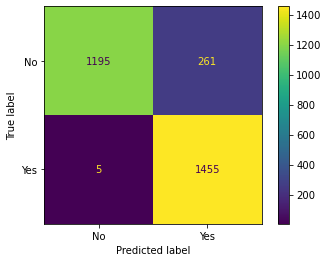

In [401]:
confm_2 = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_2), display_labels = ['No', 'Yes']).plot()
confm_2

In [402]:
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test, pred_2).ravel()
(tn_2, fp_2, fn_2, tp_2)

(1195, 261, 5, 1455)

In [403]:
accuracy_2 = (tp_2 + tn_2) / len(y_test)
precision_2 = tp_2 / (tp_2 + fp_2)
sensitivity_2 = tp_2 / (tp_2 + fn_2)
specificity_2 = tn_2 / (fp_2 + tn_2)

print('KNN Metrics - K=5')
print('Accuracy = ', accuracy_2)
print('Precision = ', precision_2)
print('Sensitivity = ', sensitivity_2)
print('Specificity = ', specificity_2)

#I have the feeling this model is overfitted. I will look for a range of K.

KNN Metrics - K=5
Accuracy =  0.9087791495198903
Precision =  0.8479020979020979
Sensitivity =  0.9965753424657534
Specificity =  0.8207417582417582


In [404]:
pred_2_probs = model_2.predict_proba(X_test)[:,1]
pred_2_probs

array([0.8, 0. , 0. , ..., 0. , 1. , 0.2])

In [405]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_2_probs, pos_label= 1)

In [406]:
roc_auc_2 = auc(fpr2, tpr2)
roc_auc_2

0.9668984269155502

In [407]:
k_values = list(range(10, 100, 10))
results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_sm, y_sm, cv = None, scoring = 'accuracy')
    results[k] = scores.mean()


In [408]:
best_k = max(results, key=results.get)

In [409]:
print("Best k:", best_k)
print('Average accuracy:', results[best_k])

Best k: 10
Average accuracy: 0.8918724279835392


In [410]:
model_3 =KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [411]:
pred_3 = model_3.predict(X_test)
print(classification_report(y_test, pred_3))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1456
           1       0.82      1.00      0.90      1460

    accuracy                           0.89      2916
   macro avg       0.91      0.89      0.89      2916
weighted avg       0.91      0.89      0.89      2916



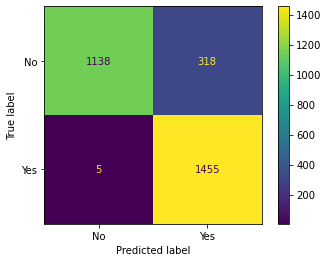

In [412]:
confm_3 = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_3), display_labels = ['No', 'Yes']).plot()
confm_3

In [413]:
tn_3, fp_3, fn_3, tp_3 = confusion_matrix(y_test, pred_3).ravel() 
(tn_3, fp_3, fn_3, tp_3)

(1138, 318, 5, 1455)

In [414]:
accuracy_3 = (tp_3 + tn_3) / len(y_test)
precision_3 = tp_3 / (tp_3 + fp_3)
sensitivity_3 = tp_3 / (tp_3 + fn_3)
specificity_3 = tn_3 / (fp_3 + tn_3)

print('KNN Metrics - K=10')
print('Accuracy = ', accuracy_3)
print('Precision = ', precision_3)
print('Sensitivity = ', sensitivity_3)
print('Specificity = ', specificity_3)

KNN Metrics - K=10
Accuracy =  0.8892318244170097
Precision =  0.8206429780033841
Sensitivity =  0.9965753424657534
Specificity =  0.7815934065934066


In [415]:
pred_3_probs = model_3.predict_proba(X_test)[:,1]
pred_3_probs

array([0.9, 0. , 0. , ..., 0. , 1. , 0.3])

In [416]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_3_probs, pos_label= 1)

In [417]:
roc_auc_3 = auc(fpr3, tpr3)
roc_auc_3

0.9654874021526418

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1456
           1       0.96      0.98      0.97      1460

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



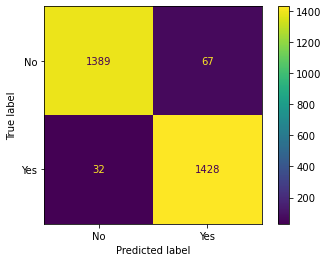

In [418]:
#Random Forest
model_4 =RandomForestClassifier().fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
print(classification_report(y_test, pred_4))
confm_4 = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_4), display_labels = ['No', 'Yes']).plot()
confm_4


In [419]:
tn_4, fp_4, fn_4, tp_4 = confusion_matrix(y_test, pred_4).ravel() 
(tn_4, fp_4, fn_4, tp_4)

(1389, 67, 32, 1428)

In [420]:
accuracy_4 = (tp_4 + tn_4) / len(y_test)
precision_4 = tp_4 / (tp_4 + fp_4)
sensitivity_4 = tp_4 / (tp_4 + fn_4)
specificity_4 = tn_4 / (fp_4 + tn_4)

print('Random Forest')
print('Accuracy = ', accuracy_4)
print('Precision = ', precision_4)
print('Sensitivity = ', sensitivity_4)
print('Specificity = ', specificity_4)

Random Forest
Accuracy =  0.9660493827160493
Precision =  0.9551839464882943
Sensitivity =  0.9780821917808219
Specificity =  0.9539835164835165


In [421]:
pred_4_probs = model_4.predict_proba(X_test)[:,1]
pred_4_probs

array([0.35, 0.03, 0.05, ..., 0.  , 0.96, 0.02])

In [422]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, pred_4_probs, pos_label= 1)

In [423]:
roc_auc_4 = auc(fpr4, tpr4)
roc_auc_4

0.9946151023633901

In [424]:
# I will like to tune the model more towards sensitivity accuracy. I will use Gradient boosting algorithms.
#XGBoost
model_5 = xgb.XGBClassifier()
model_5.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)


In [425]:
accuracy = accuracy_score(y_test, pred_5)
print(classification_report(y_test, pred_5))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1456
           1       0.95      0.96      0.96      1460

    accuracy                           0.96      2916
   macro avg       0.96      0.96      0.96      2916
weighted avg       0.96      0.96      0.96      2916



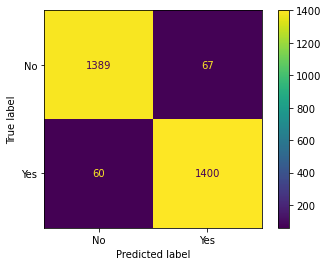

In [426]:
confm_5 = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_5), display_labels = ['No', 'Yes']).plot()
confm_5
#This model may be overfitting for strokes. Hyperparameters need to be the next step

In [427]:
tn_5, fp_5, fn_5, tp_5 = confusion_matrix(y_test, pred_5).ravel() 
(tn_5, fp_5, fn_5, tp_5)

(1389, 67, 60, 1400)

In [428]:
accuracy_5 = (tp_5 + tn_5) / len(y_test)
precision_5 = tp_5 / (tp_5 + fp_5)
sensitivity_5 = tp_5 / (tp_5 + fn_5)
specificity_5 = tn_5 / (fp_5 + tn_5)

print('XGboost')
print('Accuracy = ', accuracy_5)
print('Precision = ', precision_5)
print('Sensitivity = ', sensitivity_5)
print('Specificity = ', specificity_5)

XGboost
Accuracy =  0.9564471879286695
Precision =  0.9543285616905249
Sensitivity =  0.958904109589041
Specificity =  0.9539835164835165


In [429]:
pred_5_probs = model_5.predict_proba(X_test)[:,1]
pred_5_probs

array([0.12125173, 0.00634639, 0.0060658 , ..., 0.00212878, 0.9978357 ,
       0.00262867], dtype=float32)

In [430]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, pred_5_probs, pos_label= 1)

In [431]:
roc_auc_5 = auc(fpr5, tpr5)
roc_auc_5

0.9926002935420744

In [432]:
#With some Hyperparameters
model_6 = xgb.XGBClassifier(learning_rate=0.01,      
    max_depth=4,              
    min_child_weight=5,       
    subsample=0.8,            
    n_estimators=100, alpha=0.1, gamma=0.0, objective='binary:logistic'  )

In [433]:
model_6.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)
accuracy = accuracy_score(y_test, pred_6)
print(classification_report(y_test, pred_6))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1456
           1       0.80      0.90      0.85      1460

    accuracy                           0.84      2916
   macro avg       0.84      0.84      0.83      2916
weighted avg       0.84      0.84      0.83      2916



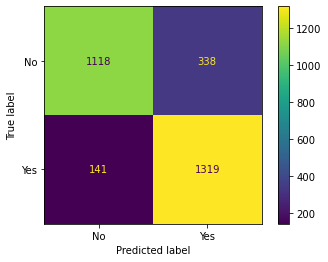

In [434]:
confm_6 = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_6), display_labels = ['No', 'Yes']).plot()
confm_6

In [435]:
tn_6, fp_6, fn_6, tp_6 = confusion_matrix(y_test, pred_6).ravel() 
(tn_6, fp_6, fn_6, tp_6)

(1118, 338, 141, 1319)

In [436]:
accuracy_6 = (tp_6 + tn_6) / len(y_test)
precision_6 = tp_6 / (tp_6 + fp_6)
sensitivity_6 = tp_6 / (tp_6 + fn_6)
specificity_6 = tn_6 / (fp_6 + tn_6)

print('XGboost Hyperparameters')
print('Accuracy = ', accuracy_6)
print('Precision = ', precision_6)
print('Sensitivity = ', sensitivity_6)
print('Specificity = ', specificity_6)

XGboost Hyperparameters
Accuracy =  0.8357338820301783
Precision =  0.796016898008449
Sensitivity =  0.9034246575342466
Specificity =  0.7678571428571429


In [437]:
pred_6_probs = model_6.predict_proba(X_test)[:,1]
pred_6_probs

array([0.6471187 , 0.34453028, 0.46439528, ..., 0.25683343, 0.599757  ,
       0.25931004], dtype=float32)

In [438]:
fpr6, tpr6, thresholds6 = roc_curve(y_test, pred_6_probs, pos_label= 1)

In [439]:
roc_auc_5 = auc(fpr5, tpr5)
roc_auc_5

0.9926002935420744